In [52]:
#import the required librarys
import numpy as np 
import pandas as pd 
from sklearn import preprocessing 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt 
import matplotlib.pyplot as plt
import seaborn as sns 

In [53]:
PM_set=pd.read_csv(r"I:\Rworkshop\Pharmaceuticals.csv")
PM_set.head()

,Symbol,Name,Market_Cap,Beta,PE_Ratio,ROE,ROA,Asset_Turnover,Leverage,Rev_Growth,Net_Profit_Margin,Median_Recommendation,Location,Exchange
0,ABT,Abbott Laboratories,68.44,0.32,24.7,26.4,11.8,0.7,0.42,7.54,16.1,Moderate Buy,US,NYSE
1,AGN,"Allergan, Inc.",7.58,0.41,82.5,12.9,5.5,0.9,0.60,9.16,5.5,Moderate Buy,CANADA,NYSE
2,AHM,Amersham plc,6.30,0.46,20.7,14.9,7.8,0.9,0.27,7.05,11.2,Strong Buy,UK,NYSE
3,AZN,AstraZeneca PLC,67.63,0.52,21.5,27.4,15.4,0.9,0.00,15.00,18.0,Moderate Sell,UK,NYSE
4,AVE,Aventis,47.16,0.32,20.1,21.8,7.5,0.6,0.34,26.81,12.9,Moderate Buy,FRANCE,NYSE


In [55]:
PM_set.head()

,Symbol,Name,Market_Cap,Beta,PE_Ratio,ROE,ROA,Asset_Turnover,Leverage,Rev_Growth,Net_Profit_Margin,Median_Recommendation,Location,Exchange
0,ABT,Abbott Laboratories,68.44,0.32,24.7,26.4,11.8,0.7,0.42,7.54,16.1,Moderate Buy,US,NYSE
1,AGN,"Allergan, Inc.",7.58,0.41,82.5,12.9,5.5,0.9,0.60,9.16,5.5,Moderate Buy,CANADA,NYSE
2,AHM,Amersham plc,6.30,0.46,20.7,14.9,7.8,0.9,0.27,7.05,11.2,Strong Buy,UK,NYSE
3,AZN,AstraZeneca PLC,67.63,0.52,21.5,27.4,15.4,0.9,0.00,15.00,18.0,Moderate Sell,UK,NYSE
4,AVE,Aventis,47.16,0.32,20.1,21.8,7.5,0.6,0.34,26.81,12.9,Moderate Buy,FRANCE,NYSE


In [56]:
PM_set.isnull().sum()

Symbol                   0
Name                     0
Market_Cap               0
Beta                     0
PE_Ratio                 0
ROE                      0
ROA                      0
Asset_Turnover           0
Leverage                 0
Rev_Growth               0
Net_Profit_Margin        0
Median_Recommendation    0
Location                 0
Exchange                 0
dtype: int64

In [57]:
PM_set1=PM_set.copy()

In [58]:
PM_set2=PM_set1.drop(['Symbol','Name','Median_Recommendation','Location','Exchange'] ,axis=1)

In [59]:
PM_set2.head()

,Market_Cap,Beta,PE_Ratio,ROE,ROA,Asset_Turnover,Leverage,Rev_Growth,Net_Profit_Margin
0,68.44,0.32,24.7,26.4,11.8,0.7,0.42,7.54,16.1
1,7.58,0.41,82.5,12.9,5.5,0.9,0.60,9.16,5.5
2,6.30,0.46,20.7,14.9,7.8,0.9,0.27,7.05,11.2
3,67.63,0.52,21.5,27.4,15.4,0.9,0.00,15.00,18.0
4,47.16,0.32,20.1,21.8,7.5,0.6,0.34,26.81,12.9


In [60]:
#Normalising the data
dfnormalize= preprocessing.normalize(PM_set2)
print(type(PM_set2))
print(PM_set2.columns)
PM_clustering=pd.DataFrame(dfnormalize, columns=PM_set2.columns)
PM_clustering.head()

<class 'pandas.core.frame.DataFrame'>
Index(['Market_Cap', 'Beta', 'PE_Ratio', 'ROE', 'ROA', 'Asset_Turnover',
       'Leverage', 'Rev_Growth', 'Net_Profit_Margin'],
      dtype='object')


,Market_Cap,Beta,PE_Ratio,ROE,ROA,Asset_Turnover,Leverage,Rev_Growth,Net_Profit_Margin
0,0.852366,0.003985,0.307619,0.328791,0.146960,0.008718,0.005231,0.093905,0.200513
1,0.089481,0.004840,0.973906,0.152283,0.064927,0.010624,0.007083,0.108133,0.064927
2,0.206889,0.015106,0.679779,0.489310,0.256149,0.029556,0.008867,0.231519,0.367803
3,0.834108,0.006413,0.265168,0.337935,0.189934,0.011100,0.000000,0.185001,0.222001
4,0.741476,0.005031,0.316023,0.342752,0.117919,0.009434,0.005346,0.421522,0.202821


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


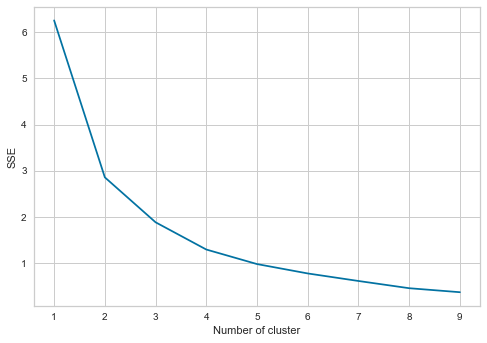

In [80]:
#PM_clustering["clusters"] = kmeans.labels_
#print(data_for_clustering["clusters"])
# Inertia: Sum of distances of samples to their closest cluster center
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(PM_clustering)
    
    sse[k] = kmeans.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [64]:
# From the graph we can say that there are 3 clusters
kmeans = KMeans(n_clusters=3) 
kmeans.fit(PM_clustering)
cluster_ids=kmeans.predict( PM_clustering)
cluster_ids

array([1, 0, 2, 1, 1, 0, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 0, 1, 2, 1])

In [65]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(PM_clustering)
means=kmeans.cluster_centers_
print(means)

[[0.82563235 0.00465158 0.2230278  0.35584598 0.14938553 0.0083893
  0.00376082 0.11701106 0.21128614]
 [0.06971923 0.01747671 0.51478565 0.435141   0.16251763 0.01483885
  0.03256234 0.50226553 0.33888161]
 [0.42623443 0.01438246 0.83266456 0.14434043 0.05867405 0.01198951
  0.00377072 0.06459597 0.07718125]]


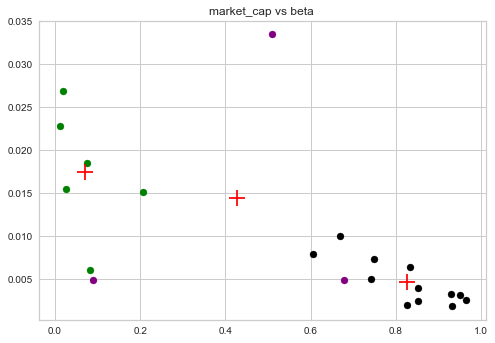

In [66]:
plt.scatter(PM_clustering.Market_Cap[cluster_ids==0],PM_clustering.Beta[cluster_ids==0],c='purple',label='cluster0')
plt.scatter(PM_clustering.Market_Cap[cluster_ids==1],PM_clustering.Beta[cluster_ids==1],c='black',label='cluster1')
plt.scatter(PM_clustering.Market_Cap[cluster_ids==2],PM_clustering.Beta[cluster_ids==2],c='green',label='cluster2')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],marker='+',c='red',s=250,label='centroids')
plt.title('market_cap vs beta ')
plt.show()

In [84]:
import sklearn.metrics as metrics
import sklearn.cluster as cluster
SK = range(3,13)
sil_score = []
for i in SK:
    labels=cluster.KMeans(n_clusters=i,init="k-means++",random_state=42).fit(PM_clustering).labels_
    score = metrics.silhouette_score(PM_clustering,labels,metric="euclidean",sample_size=250,random_state=42)
    sil_score.append(score)
    print ("Silhouette score for k(clusters) = "+str(i)+" is "
           +str(metrics.silhouette_score(PM_clustering,labels,metric="euclidean",sample_size=250,random_state=42)))

Silhouette score for k(clusters) = 3 is 0.4823595231055198
Silhouette score for k(clusters) = 4 is 0.4989073348827159
Silhouette score for k(clusters) = 5 is 0.3665397567547569
Silhouette score for k(clusters) = 6 is 0.35593791301478733
Silhouette score for k(clusters) = 7 is 0.3486702341534849
Silhouette score for k(clusters) = 8 is 0.3258851489963157
Silhouette score for k(clusters) = 9 is 0.3153741614925155
Silhouette score for k(clusters) = 10 is 0.2905771081305032
Silhouette score for k(clusters) = 11 is 0.27848364362159933
Silhouette score for k(clusters) = 12 is 0.22783146635667148


In [85]:
sil_centers = pd.DataFrame({'Clusters' : SK, 'Sil Score' : sil_score})
sil_centers

,Clusters,Sil Score
0,3,0.482360
1,4,0.498907
2,5,0.366540
3,6,0.355938
4,7,0.348670
5,8,0.325885
6,9,0.315374
7,10,0.290577
8,11,0.278484
9,12,0.227831


<AxesSubplot:xlabel='Clusters', ylabel='Sil Score'>

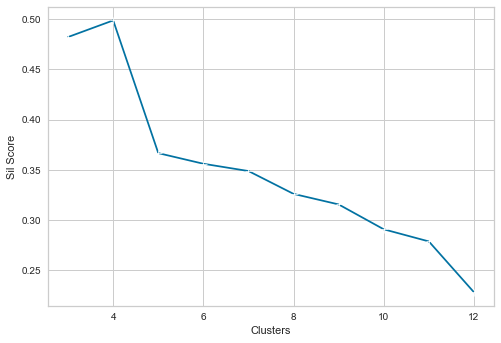

In [86]:
sns.lineplot(x = 'Clusters', y = 'Sil Score', data = sil_centers, marker="+")

In [96]:
PM_clustering['Clusters'] = kmeans.labels_

<AxesSubplot:xlabel='Market_Cap', ylabel='Beta'>

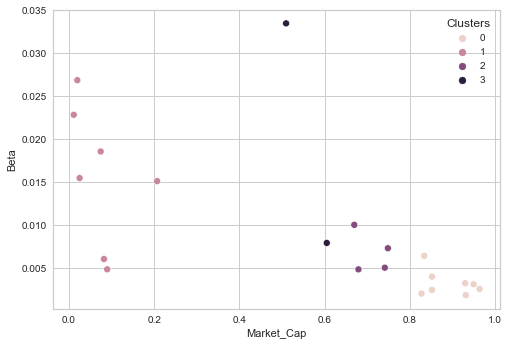

In [97]:
sns.scatterplot(x="Market_Cap", y="Beta",hue = 'Clusters',  data=PM_clustering)


In [98]:
# BY observing two method I was choosing k=3

In [99]:
PM_clustering[cluster_ids==0].describe()

,Market_Cap,Beta,PE_Ratio,ROE,ROA,Asset_Turnover,Leverage,Rev_Growth,Net_Profit_Margin,Clusters
count,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.0
mean,0.426234,0.014382,0.832665,0.144340,0.058674,0.011990,0.003771,0.064596,0.077181,2.0
std,0.303761,0.016534,0.145791,0.023775,0.014386,0.005549,0.003564,0.143467,0.011689,1.0
min,0.089481,0.004833,0.682715,0.117611,0.042219,0.007250,0.000000,-0.095597,0.064927,1.0
25%,0.299565,0.004837,0.762044,0.134947,0.053573,0.008937,0.002115,0.006268,0.071667,1.5
50%,0.509649,0.004840,0.841373,0.152283,0.064927,0.010624,0.004229,0.108133,0.078408,2.0
75%,0.594611,0.019157,0.907639,0.157705,0.066901,0.014359,0.005656,0.144692,0.083308,2.5
max,0.679573,0.033474,0.973906,0.163127,0.068876,0.018094,0.007083,0.181252,0.088209,3.0


In [100]:
PM_clustering[cluster_ids==1].describe()

,Market_Cap,Beta,PE_Ratio,ROE,ROA,Asset_Turnover,Leverage,Rev_Growth,Net_Profit_Margin,Clusters
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.00000
mean,0.825632,0.004652,0.223028,0.355846,0.149386,0.008389,0.003761,0.117011,0.211286,0.75000
std,0.114483,0.002675,0.088341,0.149885,0.053175,0.003515,0.004255,0.115761,0.084441,1.13818
min,0.605226,0.001831,0.112404,0.158520,0.090345,0.003810,0.000000,-0.025929,0.098953,0.00000
25%,0.746909,0.002523,0.151218,0.267993,0.107285,0.006291,0.000572,0.048797,0.140457,0.00000
50%,0.843189,0.003607,0.205477,0.340343,0.144322,0.007628,0.002169,0.107775,0.209368,0.00000
75%,0.930626,0.006633,0.308889,0.440244,0.173703,0.009850,0.005494,0.156518,0.271817,2.00000
max,0.964033,0.010018,0.371259,0.689498,0.261257,0.015715,0.014066,0.421522,0.345723,3.00000


In [101]:
PM_clustering[cluster_ids==2].describe()

,Market_Cap,Beta,PE_Ratio,ROE,ROA,Asset_Turnover,Leverage,Rev_Growth,Net_Profit_Margin,Clusters
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.0
mean,0.069719,0.017477,0.514786,0.435141,0.162518,0.014839,0.032562,0.502266,0.338882,1.0
std,0.073470,0.007188,0.224925,0.176648,0.056469,0.008460,0.032930,0.277113,0.080200,0.0
min,0.011014,0.006039,0.089520,0.230962,0.111357,0.006186,0.005033,0.171382,0.201468,1.0
25%,0.020733,0.015196,0.489305,0.286371,0.118336,0.008740,0.011445,0.273504,0.318245,1.0
50%,0.049492,0.017013,0.578993,0.432398,0.148965,0.014350,0.022893,0.512869,0.349265,1.0
75%,0.080084,0.021765,0.657279,0.580604,0.188398,0.016878,0.037703,0.707269,0.376925,1.0
max,0.206889,0.026856,0.698424,0.647385,0.256149,0.029556,0.094287,0.850689,0.439241,1.0


In [ ]:
# Based on comparing in Market_cap the three cluster standard deviation and and mean vlaues we can say that companies are devided into   cluster 0 are large, cluster 1 are medium and cluster 2 small;
# In Beta column it has  high mean values in cluster 0 
# In PE_Ratio cluster 0 have high value , and cluster 1 has very low and cluster 2 has medium value it has high growth
# By the mean and std value in ROE cluster 2 has high value ,and  other to have low values and cluster 0 have less value.
#In ROA Cluster 0 having low mean value with respect to other 2 clusters.
# Asset_Turnover cluster1 haveing high mean value it generating more revenue on investement
#Leverage mean debt to investing on companies cluster 1 have more debt mean vlaue compared to other
# Rev_Growth cluster 2 having highest value then other cluster 1 have least mean value
# Net_Profit_Margin cluster2 have highest net margin and cluster 0 having lowest net profit

In [ ]:
#Pattern in numerical variables

In [93]:
PM_set[cluster_ids==0]

,Symbol,Name,Market_Cap,Beta,PE_Ratio,ROE,ROA,Asset_Turnover,Leverage,Rev_Growth,Net_Profit_Margin,Median_Recommendation,Location,Exchange
1,AGN,"Allergan, Inc.",7.58,0.41,82.5,12.9,5.5,0.9,0.60,9.16,5.5,Moderate Buy,CANADA,NYSE
5,BAY,Bayer AG,16.90,1.11,27.9,3.9,1.4,0.6,0.00,-3.17,2.6,Hold,GERMANY,NYSE
17,PHA,Pharmacia Corporation,56.24,0.40,56.5,13.5,5.7,0.6,0.35,15.00,7.3,Hold,US,NYSE


In [ ]:
#In this table of cluster 0 all companies in NYSE, having Median_Recommendation hold and moderate buy

In [94]:
PM_set[cluster_ids==1]

,Symbol,Name,Market_Cap,Beta,PE_Ratio,ROE,ROA,Asset_Turnover,Leverage,Rev_Growth,Net_Profit_Margin,Median_Recommendation,Location,Exchange
0,ABT,Abbott Laboratories,68.44,0.32,24.7,26.4,11.8,0.7,0.42,7.54,16.1,Moderate Buy,US,NYSE
3,AZN,AstraZeneca PLC,67.63,0.52,21.5,27.4,15.4,0.9,0.00,15.00,18.0,Moderate Sell,UK,NYSE
4,AVE,Aventis,47.16,0.32,20.1,21.8,7.5,0.6,0.34,26.81,12.9,Moderate Buy,FRANCE,NYSE
6,BMY,Bristol-Myers Squibb Company,51.33,0.50,13.9,34.8,15.1,0.9,0.57,2.70,20.6,Moderate Sell,US,NYSE
9,LLY,Eli Lilly and Company,73.84,0.18,27.9,31.0,13.5,0.6,0.53,6.21,23.4,Hold,US,NYSE
10,GSK,GlaxoSmithKline plc,122.11,0.35,18.0,62.9,20.3,1.0,0.34,21.87,21.1,Hold,UK,NYSE
12,JNJ,Johnson & Johnson,173.93,0.46,28.4,28.6,16.3,0.9,0.10,9.37,17.9,Moderate Buy,US,NYSE
14,MRK,"Merck & Co., Inc.",132.56,0.46,18.9,40.6,15.0,1.1,0.28,17.35,14.1,Hold,US,NYSE
15,NVS,Novartis AG,96.65,0.19,21.6,17.9,11.2,0.5,0.06,-2.69,22.4,Hold,SWITZERLAND,NYSE
16,PFE,Pfizer Inc,199.47,0.65,23.6,45.6,19.2,0.8,0.16,25.54,25.2,Moderate Buy,US,NYSE


In [ ]:
#In this table of cluster1  Diverse companies in NYSE and majority are in US,UK. having Median_Recommendation hold and moderate buy

In [95]:
PM_set[cluster_ids==2]

,Symbol,Name,Market_Cap,Beta,PE_Ratio,ROE,ROA,Asset_Turnover,Leverage,Rev_Growth,Net_Profit_Margin,Median_Recommendation,Location,Exchange
2,AHM,Amersham plc,6.30,0.46,20.7,14.9,7.8,0.9,0.27,7.05,11.2,Strong Buy,UK,NYSE
7,CHTT,"Chattem, Inc",0.41,0.85,26.0,24.1,4.3,0.6,3.51,6.38,7.5,Moderate Buy,US,NASDAQ
8,ELN,"Elan Corporation, plc",0.78,1.08,3.6,15.1,5.1,0.3,1.07,34.21,13.3,Moderate Sell,IRELAND,NYSE
11,IVX,IVAX Corporation,2.60,0.65,19.9,21.4,6.8,0.6,1.45,13.99,11.0,Hold,US,AMEX
13,MRX,Medicis Pharmaceutical Corporation,1.20,0.75,28.6,11.2,5.4,0.3,0.93,30.37,21.3,Moderate Buy,US,NYSE
19,WPI,"Watson Pharmaceuticals, Inc.",3.26,0.24,18.4,10.2,6.8,0.5,0.20,29.18,15.1,Moderate Sell,US,NYSE


In [ ]:
#In this table of cluster 2 Diverse companies in NYSE,NASDAQ and AMEX, having Median_Recommendation hold,moderate sell and moderate buy.
#These are majorly located in US,UK and Ireland

In [ ]:
#NAMES
#Business invloves finance and investement to run so i would like to name them as Risk
# It as High,Medium and Low 
# From the variable i can say
# cluster 0 LOW RISK (because it has good market cap and better lavarage value )
# Cluster2 MEDIUM RISK(it has good economics growth, net profit and less laverage)
# cluster1 HIGH RISK(It has more laverage than turnover )

